In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("drive/MyDrive/archive/Phishing_Legitimate_full.csv")

In [3]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [5]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(10000, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [8]:
class_counts = df['CLASS_LABEL'].value_counts()
print(class_counts)

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


Text(0, 0.5, 'Count')

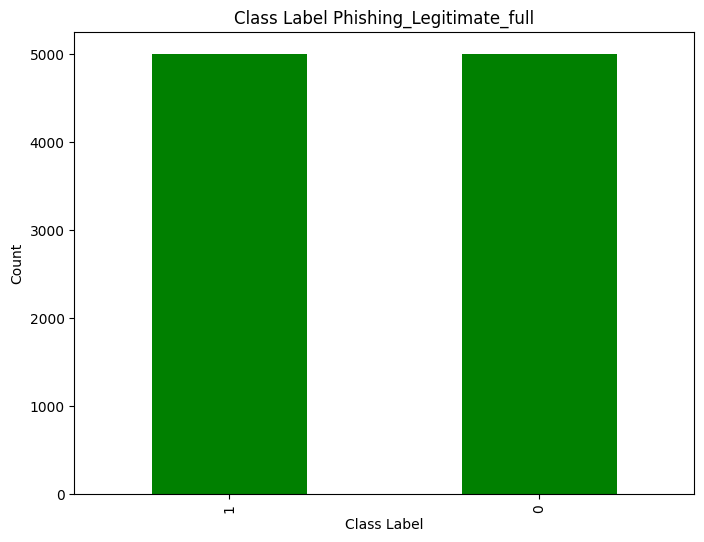

In [9]:

plt.figure(figsize=(8, 6)) #Tạo một hình vẽ mới với kích thước 8x6 inches
class_counts.plot(kind='bar', color='green') #Vẽ biểu đồ cột của số lượng mẫu trong mỗi nhóm (giá trị) của cột "CLASS_LABEL"
plt.title('Class Label Phishing_Legitimate_full') #đặt tên cho biểu đồ
plt.xlabel('Class Label') #đặt nhãn cho trục x
plt.ylabel('Count') #đặt nhãn cho trục y

In [10]:
correlations = []
for feature in df.columns[:-1]: #Duyệt qua từng cột (trừ cột cuối cùng 'CLASS_LABEL')
    correlation = df['CLASS_LABEL'].corr(df[feature]) #tính toán hệ số tương quan giữa cột 'CLASS_LABEL' và từng cột khác.
    correlations.append((feature, correlation))  #lưu kết quả vào ds correlations dưới dạng tuple (tên cột, hệ số tương quan).

correlations.sort(key=lambda x: abs(x[1]), reverse=True) #sắp xếp ds theo giá trị tương quan (thứ tự giảm dần).

for feature, correlation in correlations:
    print(f"Correlation between {feature} and CLASS_LABEL: {correlation:.2f}") #In ra tên cột và hệ số tương quan đã sắp xếp theo giá trị tuyệt đối.

Correlation between id and CLASS_LABEL: -0.87
Correlation between HttpsInHostname and CLASS_LABEL: nan
Correlation between PctExtNullSelfRedirectHyperlinksRT and CLASS_LABEL: -0.54
Correlation between FrequentDomainNameMismatch and CLASS_LABEL: 0.46
Correlation between NumDash and CLASS_LABEL: -0.37
Correlation between SubmitInfoToEmail and CLASS_LABEL: -0.36
Correlation between PctNullSelfRedirectHyperlinks and CLASS_LABEL: 0.34
Correlation between InsecureForms and CLASS_LABEL: 0.32
Correlation between NumDots and CLASS_LABEL: 0.29
Correlation between PctExtHyperlinks and CLASS_LABEL: 0.26
Correlation between NumSensitiveWords and CLASS_LABEL: 0.26
Correlation between IframeOrFrame and CLASS_LABEL: -0.24
Correlation between PathLevel and CLASS_LABEL: 0.23
Correlation between AbnormalExtFormActionR and CLASS_LABEL: 0.19
Correlation between UrlLengthRT and CLASS_LABEL: 0.17
Correlation between HostnameLength and CLASS_LABEL: 0.17
Correlation between NumDashInHostname and CLASS_LABEL: 0

In [11]:
X = df.drop(columns=['CLASS_LABEL', 'id'])  #Tạo một DataFrame mới là X để loại bỏ các cột không cần thiết (class_label và id)
y = df['CLASS_LABEL']  #Tạo một y chứa cột 'CLASS_LABEL', là biến mục tiêu cần dự đoán.
#X bây giờ chứa dữ liệu đầu vào sau khi loại bỏ cột không cần thiết.
scaler = StandardScaler() #Tạo một đối tượng StandardScaler để chuẩn hóa dữ liệu.
X = scaler.fit_transform(X)#Chuẩn hóa dữ liệu đầu vào X (đảm bảo rằng các đặc trưng sẽ có giá trị trung bình gần bằng 0 và độ lệch chuẩn gần bằng 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #Tách dữ liệu thành tập huấn luyện và tập kiểm tra

lớp RandomForestClassifier từ thư viện scikit-learn

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Huấn luyện mô hình
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Training time: {:.2f} seconds" .format(training_time))
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Training time: 1.27 seconds
Accuracy: 98.25%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



<Axes: >

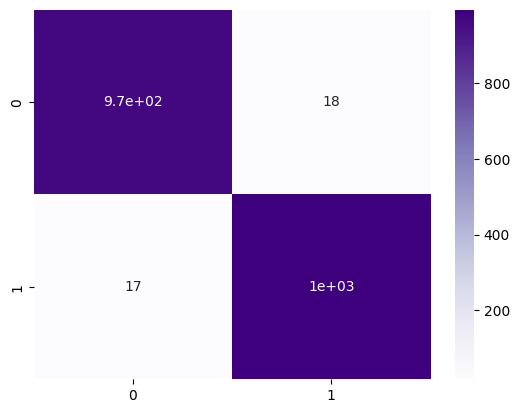

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Purples')

lớp DecisionTreeClassifier từ thư viện scikit-learn.

In [14]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth=3)
start_time = time.time()
treemodel.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time


[Text(0.5, 0.875, 'x[47] <= -0.907\ngini = 0.5\nsamples = 8000\nvalue = [4012, 3988]'),
 Text(0.25, 0.625, 'x[4] <= 1.185\ngini = 0.082\nsamples = 2368\nvalue = [101, 2267]'),
 Text(0.125, 0.375, 'x[38] <= 1.108\ngini = 0.066\nsamples = 2342\nvalue = [80, 2262]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 2289\nvalue = [58, 2231]'),
 Text(0.1875, 0.125, 'gini = 0.486\nsamples = 53\nvalue = [22, 31]'),
 Text(0.375, 0.375, 'x[24] <= 1.06\ngini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.3125, 0.125, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.625, 'x[26] <= -0.703\ngini = 0.424\nsamples = 5632\nvalue = [3911, 1721]'),
 Text(0.625, 0.375, 'x[29] <= -0.948\ngini = 0.302\nsamples = 1862\nvalue = [345, 1517]'),
 Text(0.5625, 0.125, 'gini = 0.456\nsamples = 259\nvalue = [168, 91]'),
 Text(0.6875, 0.125, 'gini = 0.196\nsamples = 1603\nvalue = [177, 1426]'),
 Text(0.875, 0.375, 'x[34] <= 0.693\ngini = 0

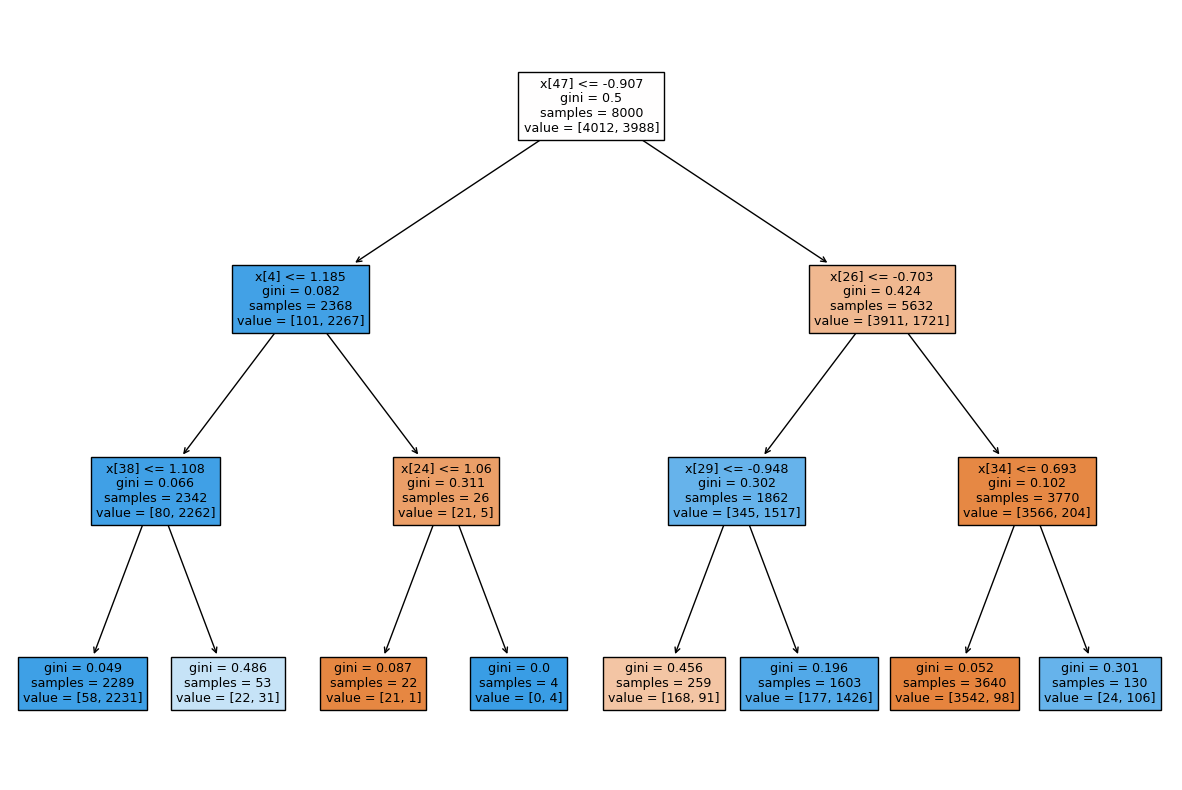

In [15]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

In [16]:
y_pred = treemodel.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
score = accuracy_score(y_pred, y_test)
print("Training time: {:.2f} seconds".format(training_time))
print(f'Accuracy: {score * 100:.2f}%')
print(classification_report(y_pred, y_test))

Training time: 0.03 seconds
Accuracy: 94.65%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       977
           1       0.95      0.94      0.95      1023

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



<Axes: >

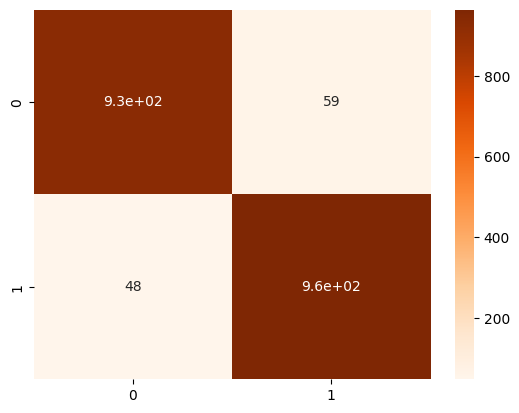

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)            #tính ma trận nhầm lẫn giữa dự đoán và nhãn thực tế (y_test)
sns.heatmap(conf_matrix, annot=True, cmap='Oranges')      #vẽ heatmap của ma trận nhầm lẫn

Xgboots

Training time_1: 0.82 seconds
Accuracy: 98.95%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       988
           1       0.99      0.99      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



<Axes: >

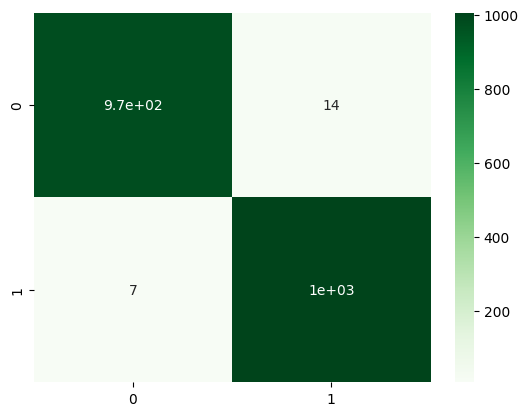

In [19]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
X = df.drop(columns=['CLASS_LABEL', 'id'])
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tạo một mô hình huấn luyện
xgb_model = xgb.XGBClassifier()
# Huấn luyện dữ liệu trên mô hình
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
# Dự đoán và đánh giá mô hình trước khi chọn 30 đặc trưng hàng đầu
y_pred = xgb_model.predict(X_test)
accuracy_xgb1 = accuracy_score(y_test, y_pred)
print("Training time_1: {:.2f} seconds" .format(training_time))
print(f'Accuracy: {accuracy_xgb1 * 100:.2f}%')
print(classification_report(y_test, y_pred))
#tính ma trận nhầm lẫn giữa dự đoán và nhãn thực tế (y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Greens')

In [20]:
# Sử dụng đặc trưng quan trọng để chọn 30 đặc trưng hàng đầu
importance = xgb_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
top_features = feature_importance.nlargest(30, 'Importance')['Feature'].values
# Chỉ chọn 30 đặc trưng đầu
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
# Sắp xếp feature_importance theo cột 'Importance' từ cao xuống thấp
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)
# In các đặc trưng đã chọn
print("Selected features:")
print(top_features)
print(feature_importance_sorted.head(30))

Selected features:
['PctExtNullSelfRedirectHyperlinksRT' 'PctExtHyperlinks'
 'FrequentDomainNameMismatch' 'InsecureForms' 'NoHttps'
 'SubmitInfoToEmail' 'PctNullSelfRedirectHyperlinks' 'NumDash'
 'ExtFavicon' 'NumDashInHostname' 'IframeOrFrame' 'NumQueryComponents'
 'ExtFormAction' 'ExtMetaScriptLinkRT' 'PathLevel' 'NumSensitiveWords'
 'QueryLength' 'NumAmpersand' 'NumUnderscore' 'PctExtResourceUrls'
 'NumNumericChars' 'SubdomainLevel' 'NumDots' 'NumPercent' 'MissingTitle'
 'AbnormalExtFormActionR' 'AbnormalFormAction' 'ImagesOnlyInForm'
 'RelativeFormAction' 'DomainInPaths']
                               Feature  Importance
47  PctExtNullSelfRedirectHyperlinksRT    0.632341
26                    PctExtHyperlinks    0.081918
34          FrequentDomainNameMismatch    0.047452
29                       InsecureForms    0.025875
14                             NoHttps    0.021004
38                   SubmitInfoToEmail    0.019659
33       PctNullSelfRedirectHyperlinks    0.013841
4        

Xuất mô hình

In [21]:
import os
from joblib import dump
dump(model, 'RF_model.joblib')
rf_model_size = os.path.getsize('RF_model.joblib') / 1024
print(f'RF_model.joblib size: {rf_model_size:.2f} KB')
print(f'Accuracy: {accuracy * 100:.2f}%')

dump(treemodel, 'DT_model.joblib')
dt_model_size = os.path.getsize('DT_model.joblib') / 1024
print(f'DT_model.joblib size: {dt_model_size:.2f} KB')
print(f'Accuracy: {score * 100:.2f}%')

dump(xgb_model, 'Xgb_model.joblib')
xgb_model_size = os.path.getsize('Xgb_model.joblib') / 1024
print(f'Xgb_model.joblib size: {xgb_model_size:.2f} KB')
print(f'Accuracy: {accuracy_xgb1 * 100:.2f}%')

RF_model.joblib size: 5423.31 KB
Accuracy: 98.25%
DT_model.joblib size: 2.27 KB
Accuracy: 94.65%
Xgb_model.joblib size: 216.66 KB
Accuracy: 98.95%


In [22]:
!pip install psutil
import psutil
# Thông tin về CPU
cpu_percent = psutil.cpu_percent(interval=1)
print("CPU Đã Sử Dụng:", cpu_percent, "%")

# Thông tin về RAM
ram = psutil.virtual_memory()
total_ram_gb = ram.total / (1024 ** 3)
used_ram_gb = ram.used / (1024 ** 3)
print(f"RAM Đã Sử Dụng/Tổng RAM: {used_ram_gb:.2f}/{total_ram_gb:.2f} GB")

# Thông tin về bộ nhớ
disk = psutil.disk_usage('/')
total_disk_gb = disk.total / (1024 ** 3)
used_disk_gb = disk.used / (1024 ** 3)
print(f"Bộ Nhớ Đã Sử Dụng/Tổng Bộ Nhớ: {used_disk_gb:.2f}/{total_disk_gb:.2f} GB")

CPU Đã Sử Dụng: 3.0 %
RAM Đã Sử Dụng/Tổng RAM: 1.12/12.67 GB
Bộ Nhớ Đã Sử Dụng/Tổng Bộ Nhớ: 27.16/107.72 GB
